In [10]:
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import numpy as np

import requests 
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
def strip_spaces(a_str_with_spaces):
    return a_str_with_spaces.replace(" ", "")


def remove_string(string):
    string = string.replace(" ","")
    for i in range(0, len(string)):
        if(string[i] == "("):
            string = string[:i]
            return strip_spaces(string)

In [13]:
URL = 'https://www.thelancet.com/journals/laneur/article/PIIS1474-4422(19)30034-1/fulltext'
page = requests.get(URL)

In [14]:
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df.columns = range(df.shape[1])
df = df.iloc[:,0:2]



In [15]:
df

,0,1
0,Global,5 528 232 (5 334 609 to 5 734 681)
1,High SDI,721 049 (674 368 to 770 105)
2,High-middle SDI,1 082 392 (989 070 to 1 191 869)
3,Middle SDI,2 229 002 (2 156 876 to 2 302 482)
4,Low-middle SDI,1 181 709 (1 124 199 to 1 234 945)
...,...,...
217,Central African Republic,4110 (3178 to 5045)
218,Congo Brazzaville),2139 (1678 to 2635)
219,Democratic Republic of the Congo,32 497 (26 643 to 37 306)
220,Equatorial Guinea,190 (112 to 287)


In [16]:
a = list() 
b = list()
for i in range(0,221):
    for j in range(1,2):
            a.append(df.at[i,j])
            
for i in range(0,221):
    for j in range(0,1):
            b.append(df.at[i,j])           
            
            
for i in range(0,221):
    s = str()
    s = a[i]
    str_en = s.encode("ascii", "ignore")
    str_de = str_en.decode()
    a[i] = str_de
    a[i] = remove_string(a[i])
    
    
d = {'stroke_number': a, 'country_name':b}
df = pd.DataFrame(data=d)



df

,stroke_number,country_name
0,5528232,Global
1,721049,High SDI
2,1082392,High-middle SDI
3,2229002,Middle SDI
4,1181709,Low-middle SDI
...,...,...
216,7656,Angola
217,4110,Central African Republic
218,2139,Congo Brazzaville)
219,32497,Democratic Republic of the Congo


In [17]:
df.dropna(how='all')
# df.describe()

,stroke_number,country_name
0,5528232,Global
1,721049,High SDI
2,1082392,High-middle SDI
3,2229002,Middle SDI
4,1181709,Low-middle SDI
...,...,...
216,7656,Angola
217,4110,Central African Republic
218,2139,Congo Brazzaville)
219,32497,Democratic Republic of the Congo


In [18]:
df.describe()

 

,stroke_number,country_name
count,218,221
unique,218,221
top,47427,Malawi
freq,1,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stroke_number  218 non-null    object
 1   country_name   221 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [20]:
df = df.drop(labels=[50,107,108], axis=0)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 220
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stroke_number  218 non-null    object
 1   country_name   218 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


In [22]:
lst = []
for i in df['stroke_number']:
    lst.append(int(i))

df['number_'] = lst

df

,stroke_number,country_name,number_
0,5528232,Global,5528232
1,721049,High SDI,721049
2,1082392,High-middle SDI,1082392
3,2229002,Middle SDI,2229002
4,1181709,Low-middle SDI,1181709
...,...,...,...
216,7656,Angola,7656
217,4110,Central African Republic,4110
218,2139,Congo Brazzaville),2139
219,32497,Democratic Republic of the Congo,32497


In [23]:
df = df.sort_values(["number_", "country_name"], ascending=False)

df = df.reset_index(drop = True)

In [24]:
df

,stroke_number,country_name,number_
0,5528232,Global,5528232
1,2229002,Middle SDI,2229002
2,1848933,East Asia,1848933
3,1790033,China,1790033
4,1181709,Low-middle SDI,1181709
...,...,...,...
213,42,Marshall Islands,42
214,33,Greenland,33
215,31,Bermuda,31
216,27,American Samoa,27


In [25]:
del df['stroke_number']

In [26]:
# df = df.drop(df.index[5:217])

In [27]:
df

,country_name,number_
0,Global,5528232
1,Middle SDI,2229002
2,East Asia,1848933
3,China,1790033
4,Low-middle SDI,1181709
...,...,...
213,Marshall Islands,42
214,Greenland,33
215,Bermuda,31
216,American Samoa,27


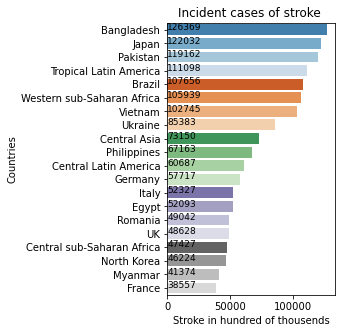

In [28]:
plt.figure(figsize=(3,5))
ax = sns.barplot(x=df['number_'][21:41], y=df['country_name'][21:41],
                 data=df, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(df["number_"][21:41]):
    ax.text(.5, i, j, color = 'black', fontsize =9)
plt.title("Incident cases of stroke ")
ax.set_xlabel(xlabel = 'Stroke in hundred of thousends', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

In [30]:
%matplotlib inline
from IPython.display import SVG, HTML

In [31]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [ ]:
# pygal.Bar()(1, 3, 3, 7)(1, 6, 6, 4).render()
# HTML(html_pygal.format(pygal_render=pygal.Bar()(1, 3, 3, 7)(1, 6, 6, 4).render()))

In [76]:
import pycountry
import pygal
from IPython.display import display, HTML
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [106]:
#Parse the dataframe
#Get the mean number of cases per states
data = df.copy()
data = data.drop(labels=range(0, 21), axis=0)
data = data.drop(labels=range(41, 217), axis=0)

mean_per_state = data.groupby('country_name')['number_'].mean()
#Draw the bar chart
barChart = pygal.Bar(height=400)
[barChart.add(x[0], x[1]) for x in mean_per_state.items()]
display(HTML(base_html.format(rendered_chart=barChart.render(is_unicode=True))))